# How to create a XBeach profiles

To create a beach profile for the lab, I suggest to use IPython but you can do that with something else (excell, matlab, C, fortran, you name it!)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Create new directories

First we will create 2 new folders where we will put our profiles

In [37]:
!mkdir /home/tristan/GEOS3009/CoastalEvol/myprofile1
!mkdir /home/tristan/GEOS3009/CoastalEvol/myprofile2
#!mkdir /home/tristan/GEOS3009/CoastalEvol/myprofile3
#!mkdir /home/tristan/GEOS3009/CoastalEvol/myprofile4

mkdir: cannot create directory ‘/home/tristan/GEOS3009/CoastalEvol/myprofile1’: File exists
mkdir: cannot create directory ‘/home/tristan/GEOS3009/CoastalEvol/myprofile2’: File exists


In [20]:
!ls /home/tristan/GEOS3009/CoastalEvol/

BaySensitivity.ipynb   default	      myprofile2
BeachProfile	       Drifter.ipynb  OilSpills.ipynb
BeachProfile1-2.ipynb  figures	      tracks
BeachProfile.ipynb     myprofile      TurtleTracking.ipynb
CreateProfile.ipynb    myprofile1     XBeach1


## Define X-axis

Creating a regularly space data between 2 points is easy with **numpy** library:

In [21]:
Xaxis = np.arange(0.,5010.,10)

## Define Y-axis

To create the Y-axis which a array of zeros in our case as we are working with profiles you can use again the **numpy** library

In [22]:
Yaxis = np.zeros(len(Xaxis))

## Define Profile elevation

I will create 2 profiles to give an idea on how to build one yourself... you can use one or the other or a combination of both to create your own one.

### First profile

In [23]:
Z1axis = np.zeros(len(Xaxis))
for i in range(len(Xaxis)):
    if Xaxis[i] <= 1200:
        z = np.exp(0.005*Xaxis[i])-50.
        if z < 2:
            Z1axis[i] = z
        else:
            Z1axis[i] = 2.
    elif Xaxis[i] > 1200 and Xaxis[i] <= 2700 :
        z = (np.exp(-(Xaxis[i]-1200)/1000)-1.)*20.
        if z >= -15:
            Z1axis[i] = (np.exp(-(Xaxis[i]-1200)/1000)-1.)*20.+2.
        else:
            Z1axis[i] = -13.
    else:
        z = (np.exp(0.0015*(Xaxis[i]-2700)))-14.
        if z < 10.:
            Z1axis[i] = z
        else:
            Z1axis[i] = 10.

### Second profile

In [24]:
Z2axis = np.zeros(len(Xaxis))
for i in range(len(Xaxis)):
    if Xaxis[i] <= 1200:
        z = np.exp(0.005*Xaxis[i])-50.
        if z < -15:
            Z2axis[i] = z
        else:
            Z2axis[i] = -15.
    elif Xaxis[i] > 1200 and Xaxis[i] <= 2700 :
        z = -15
        Z2axis[i] = z
    else:
        z = (np.exp(0.0015*(Xaxis[i]-2700)))-16.
        if z < 10.:
            Z2axis[i] = z
        else:
            Z2axis[i] = 10.

### Third profile

In [25]:
Z3axis = np.zeros(len(Xaxis))

# First I define general slopes
slp1 = 0.01
slp2 = 0.0075
# On top of these slope I add a sinusoid with different amplitudes and periods
for i in range(len(Xaxis)):
    if Xaxis[i] <= 2000:
        z1 = slp1 * Xaxis[i] -30. + 3.0 * np.sin(Xaxis[i]/2000*2*np.pi)
        if z1 < -10.:
            Z3axis[i] = z1
        else:
            Z3axis[i] = -10.
    else:
        z2 = slp2 * (Xaxis[i]-2000.) -10.
        Z3axis[i] = z2 + 2.0 * np.sin((Xaxis[i]-2000)/1000*2*np.pi)

### Fourth profile

In [26]:
Z4axis = np.zeros(len(Xaxis))

# First I define general slopes
slp1 = 0.01
slp2 = 0.0075
# On top of these slope
for i in range(len(Xaxis)):
    if Xaxis[i] <= 2000:
        z1 = slp1 * Xaxis[i] -30. 
        if z1 < -10.:
            Z4axis[i] = z1
        else:
            Z4axis[i] = -10.
    else:
        z2 = slp2 * (Xaxis[i]-2000.) -10.
        if z2 < 10.:
            Z4axis[i] = z2 
        else:
            Z4axis[i] = 10.

### Plot profiles

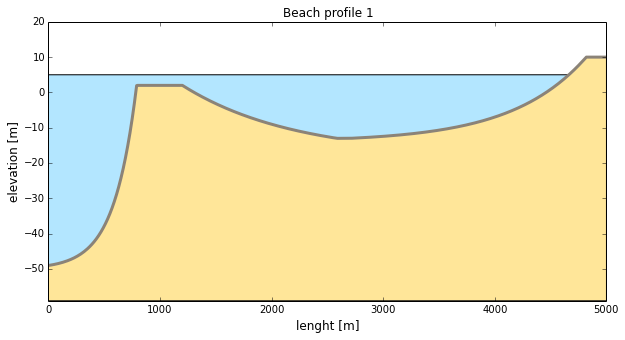

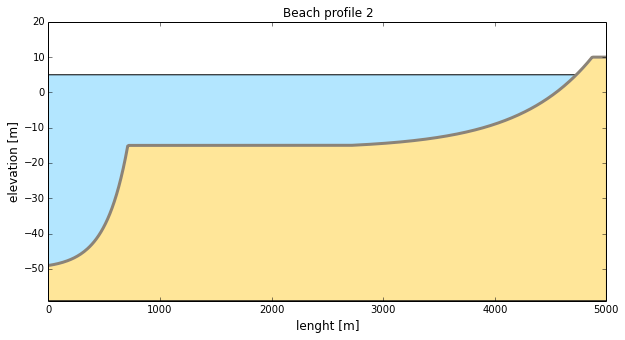

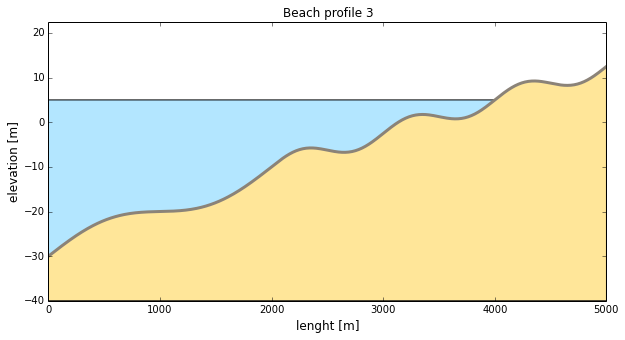

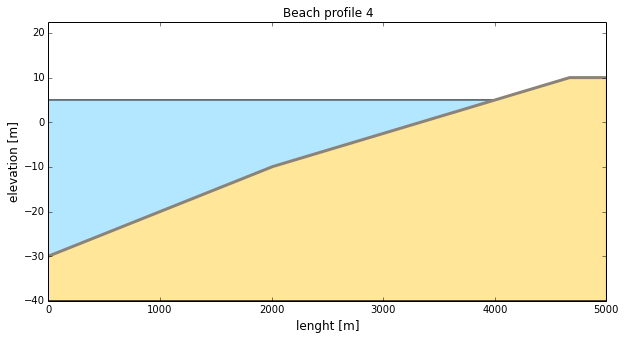

In [27]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(min(Xaxis), max(Xaxis)), ylim=(min(Z1axis)-10, max(Z1axis)+10))
plt.title('Beach profile 1', fontsize=12)
ax.set_ylabel('elevation [m]', fontsize=12)
ax.set_xlabel('lenght [m]', fontsize=12)
ax.plot(Xaxis,Z1axis,'-', lw=3,color=[139./255.,131./255.,120./255.])
ax.fill_between(Xaxis, Z1axis, min(Z1axis)-10, where=Z1axis >= min(Z1axis)-10, facecolor=[1.0,0.9,0.6], interpolate=True)

sea = np.zeros(len(Xaxis))
sea.fill(5)
ax.fill_between(Xaxis, Z1axis, sea, where= sea > Z1axis, facecolor=[0.7,0.9,1.0], interpolate=True)


plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
plt.show()

#####
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(min(Xaxis), max(Xaxis)), ylim=(min(Z2axis)-10, max(Z2axis)+10))
plt.title('Beach profile 2', fontsize=12)
ax.set_ylabel('elevation [m]', fontsize=12)
ax.set_xlabel('lenght [m]', fontsize=12)
ax.plot(Xaxis,Z2axis,'-', lw=3,color=[139./255.,131./255.,120./255.])
ax.fill_between(Xaxis, Z2axis, min(Z2axis)-10, where=Z2axis >= min(Z2axis)-10, facecolor=[1.0,0.9,0.6], interpolate=True)

sea = np.zeros(len(Xaxis))
sea.fill(5)
ax.fill_between(Xaxis, Z2axis, sea, where= sea > Z2axis, facecolor=[0.7,0.9,1.0], interpolate=True)


plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
plt.show()

#####
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(min(Xaxis), max(Xaxis)), ylim=(min(Z3axis)-10, max(Z3axis)+10))
plt.title('Beach profile 3', fontsize=12)
ax.set_ylabel('elevation [m]', fontsize=12)
ax.set_xlabel('lenght [m]', fontsize=12)
ax.plot(Xaxis,Z3axis,'-', lw=3,color=[139./255.,131./255.,120./255.])
ax.fill_between(Xaxis, Z3axis, min(Z3axis)-10, where=Z3axis >= min(Z3axis)-10, facecolor=[1.0,0.9,0.6], interpolate=True)

sea = np.zeros(len(Xaxis))
sea.fill(5)
ax.fill_between(Xaxis, Z3axis, sea, where= sea > Z3axis, facecolor=[0.7,0.9,1.0], interpolate=True)


plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
plt.show()

#####
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(min(Xaxis), max(Xaxis)), ylim=(min(Z3axis)-10, max(Z3axis)+10))
plt.title('Beach profile 4', fontsize=12)
ax.set_ylabel('elevation [m]', fontsize=12)
ax.set_xlabel('lenght [m]', fontsize=12)
ax.plot(Xaxis,Z4axis,'-', lw=3,color=[139./255.,131./255.,120./255.])
ax.fill_between(Xaxis, Z4axis, min(Z4axis)-10, where=Z4axis >= min(Z4axis)-10, facecolor=[1.0,0.9,0.6], interpolate=True)

sea = np.zeros(len(Xaxis))
sea.fill(5)
ax.fill_between(Xaxis, Z4axis, sea, where= sea > Z4axis, facecolor=[0.7,0.9,1.0], interpolate=True)


plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
plt.show()

Let's have a look at these 3 arrays:

In [6]:
#print Xaxis
#print Yaxis
#print Z1axis

## Save input files

Create the input files is again really easy using **numpy** `savetxt` function. Based on the profile you want to look at either the 1 and 2 or the 3 and 4 save the files accordingly

In [46]:
xfile = './myprofile1/x.grd'
np.savetxt(xfile, Xaxis[None], delimiter=' ', fmt='%g')

In [47]:
yfile = './myprofile1/y.grd'
np.savetxt(yfile, Yaxis[None], delimiter=' ', fmt='%g')

In [40]:
bedfile = './myprofile1/bed1.dep'
np.savetxt(bedfile, Z1axis[None], delimiter=' ', fmt='%g')

In [ ]:
xfile = './myprofile2/x.grd'
np.savetxt(xfile, Xaxis[None], delimiter=' ', fmt='%g')

In [ ]:
yfile = './myprofile2/y.grd'
np.savetxt(yfile, Yaxis[None], delimiter=' ', fmt='%g')

In [56]:
bedfile4 = './myprofile4/bed4.dep'
np.savetxt(bedfile4, Z4axis[None], delimiter=' ', fmt='%g')

### Parameters file

XBeach requires additional files to run, here we will copy them from the `default` example folder. We need:
- Sediment transport parameters file: `swtable.txt`
- Wave-spectrum boundary condition parameters file: `jonswap.txt`
- The parameter file required when calling xbeach: `params.txt`

In [53]:
!cp ./default/params.txt ./myprofile1/
!cp ./default/swtable.txt ./myprofile1/
!cp ./default/jonswap.txt ./myprofile1/
#
!cp ./default/params.txt ./myprofile2/
!cp ./default/swtable.txt ./myprofile2/
!cp ./default/jonswap.txt ./myprofile2/

Check that the profile files (*x.grd*, *y.grd* and *bed.dep*) are in the directory

In [54]:
!ls /home/tristan/GEOS3009/CoastalEvol/myprofile1

bed1.dep  jonswap.txt  params.txt  swtable.txt	x.grd  y.grd


Don't forget to modify the `params.txt` file to change the name of the newly created grids, specially ensure that you have set the proper name for required file name and to set the number of points along the X-axis:

In [55]:
print 'params.txt: nx=',len(Xaxis)-1

params.txt: nx= 500
